/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3.7475e-04 - val_loss: 5.5713e-05
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5050e-05 - val_loss: 4.6910e-05
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0664e-05 - val_loss: 3.2244e-05
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6490e-05 - val_loss: 2.0135e-05
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5809e-05 - val_loss: 1.0176e-05
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9284e-06 - val_loss: 4.8810e-06
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1613e-06 - val_loss: 4.3487e-06
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2447e-06 - val_loss: 3.9808e-06
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9384e-06 - val_loss: 4.3150e-06
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1960e-06 - val_loss: 7.7578e-06
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2361e-06 - val_

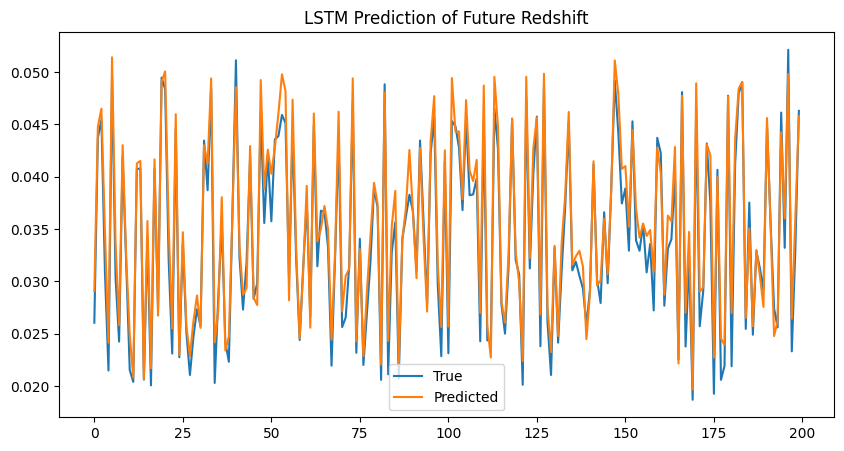

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Example: Load your time series dataset from a CSV file
# The CSV should have columns like: 'objid', 'time', 'redshift', 'ra', 'dec', etc.
# For this example, we'll simulate a simple time series dataset.
# Let's assume each object has measurements at 10 time points.

def generate_synthetic_data(n_objects=1000, n_time_steps=10):
    # Synthetic redshift evolution data with some noise
    # For simplicity, we'll simulate a linear trend plus noise.
    times = np.linspace(0, 1, n_time_steps)
    data = []
    for i in range(n_objects):
        # Random slope and intercept for synthetic time evolution
        slope = np.random.uniform(-0.005, 0.005)
        intercept = np.random.uniform(0.02, 0.05)
        redshifts = intercept + slope * times + np.random.normal(scale=0.001, size=n_time_steps)
        data.append(redshifts)
    return np.array(data), times

# Generate synthetic dataset
X_data, time_steps = generate_synthetic_data()
# For LSTM input, shape should be (samples, time_steps, features)
# Here, we have 1 feature (redshift) per time step.
X_data = X_data.reshape(-1, len(time_steps), 1)

# Suppose our target is to predict the next redshift value for each sequence
# We create targets by shifting the sequence one step ahead
y_data = np.roll(X_data, shift=-1, axis=1)[:, -1, 0]  # last value in each sequence as target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Predict and plot
y_pred = model.predict(X_test)
plt.figure(figsize=(10,5))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("LSTM Prediction of Future Redshift")
plt.show()


In [ ]:
!pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 46.5 MB/s eta 0:00:00


In [ ]:
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define Andromeda Galaxy coordinates
coords = SkyCoord('00h42m44.3s +41d16m09s', frame='icrs')

# Construct ADQL query
query = f"""
SELECT
    g.source_id,
    g.ra, -- Right Ascension
    g.dec, -- Declination
    g.parallax,
    g.pmra, -- Proper motion in RA
    g.pmdec, -- Proper motion in Dec
    g.radial_velocity,
    g.phot_g_mean_mag, -- G-band mean magnitude
    g.phot_bp_mean_mag, -- BP-band mean magnitude
    g.phot_rp_mean_mag, -- RP-band mean magnitude
    g.ref_epoch -- Reference epoch of the astrometric parameters
FROM
    gaiadr3.gaia_source AS g
WHERE
    g.ra BETWEEN 10.0 AND 11.0 -- RA range around Andromeda
    AND g.dec BETWEEN 40.5 AND 42.0 -- Dec range around Andromeda
    AND g.parallax > 0 -- To filter out distant objects
    AND g.radial_velocity IS NOT NULL;
"""

# Execute the query
job = Gaia.launch_job(query)
results = job.get_results()

print(results)

    source_id              ra                dec         ... phot_rp_mean_mag ref_epoch
                          deg                deg         ...       mag            yr   
------------------ ------------------ ------------------ ... ---------------- ---------
381134440072176512 10.002084648137537  40.75028930810975 ...        13.477217    2016.0
381352521337004800 10.002097349785192  41.84866003428311 ...        13.516345    2016.0
381170277279516800 10.002392520284433     40.87335883254 ...        12.611362    2016.0
381146500340576896 10.002751585603123      40.8308647114 ...         13.76433    2016.0
381170272981508736  10.00534805661659 40.881006797197294 ...          13.2423    2016.0
381231849930581632 10.005719915000899  41.27193359631024 ...       12.9442625    2016.0
381346130425693824 10.006574498322646   41.6597448808516 ...        13.164572    2016.0
381171857827460480 10.008924269398126  40.96996086299266 ...        12.456838    2016.0
381176801331797120 10.0102029564

In [ ]:
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define Andromeda Galaxy coordinates
coords = SkyCoord('00h42m44.3s +41d16m09s', frame='icrs')

# Construct ADQL query
query = f"""
SELECT TOP 1000
source_id, ra, dec, parallax, radial_velocity, phot_g_mean_mag,ref_epoch
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', {coords.ra.degree}, {coords.dec.degree}, 1))
AND radial_velocity IS NOT NULL
"""

# Execute the query
job = Gaia.launch_job(query)
results = job.get_results()

print(results)

    source_id              ra                dec         ... phot_g_mean_mag ref_epoch
                          deg                deg         ...       mag           yr   
------------------ ------------------ ------------------ ... --------------- ---------
387309602313648128 11.250523699523848  41.82522444574536 ...        12.35351    2016.0
387310534323330176 11.214081799124545  41.92662560724663 ...       14.886031    2016.0
387310946640191616 11.122312484586283  41.89496170916311 ...       13.992082    2016.0
387310946640225024 11.130673575963373 41.900614760732175 ...       14.488839    2016.0
387311015359667200 11.105863252661724  41.91057799972505 ...       14.082844    2016.0
387311393316785280 11.175702076199757  41.96576061949916 ...       14.003938    2016.0
387311565115476992 11.126000564257533  41.95794497943705 ...       12.935102    2016.0
387311736914163456 11.125643539454034 42.004912031557545 ...       12.543873    2016.0
387311973135694976 11.256018411262898  41.9

Data Preview:
            source_id        ra        dec  parallax      pmra     pmdec  \
0  381505593964582400  9.000620  41.910394  1.602837 -9.782839  0.128365   
1  381404507614243968  9.000867  41.227060  1.204390 -0.894932 -5.474230   
2  381419557179638784  9.002268  41.389740  7.019319  5.675224  8.424407   
3  380781531198026624  9.002318  40.323375  0.271384 -5.014006 -2.312676   
4  381423336750852352  9.007298  41.483191  1.414276 -0.103089  0.130750   

   radial_velocity  phot_g_mean_mag  ref_epoch  
0       -22.222065        14.008868     2016.0  
1        12.153476        10.618242     2016.0  
2       -24.353867        10.856852     2016.0  
3       -36.000114        14.728268     2016.0  
4         6.085216        12.158613     2016.0  

Correlation with 'radial_velocity':
source_id         -0.016495
ra                 0.005583
dec               -0.028826
parallax           0.155444
pmra               0.138914
pmdec              0.054091
radial_velocity    1.000000
ph

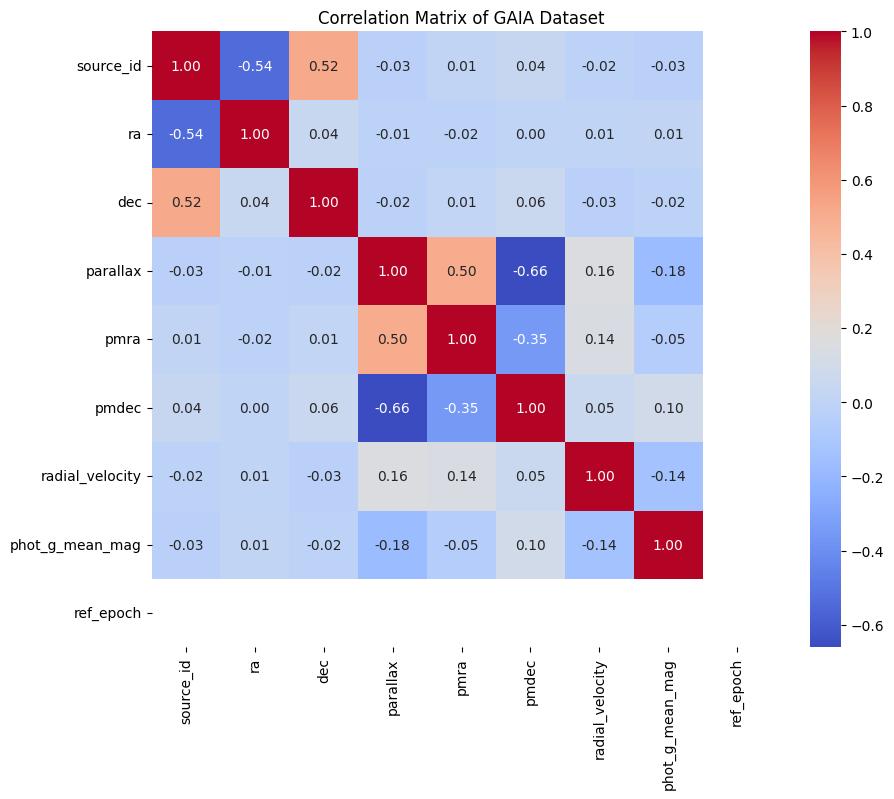

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file (ensure your CSV file is in the Colab working directory or provide the full path)
df = pd.read_csv('gaia_data.csv')

# Display the first few rows of the DataFrame
print("Data Preview:")
print(df.head())

# Compute the correlation matrix for all numeric features
corr_matrix = df.corr()

# Print the correlation values with 'radial_velocity'
print("\nCorrelation with 'radial_velocity':")
print(corr_matrix['radial_velocity'])

# Visualize the full correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of GAIA Dataset")
plt.show()


Data Preview:
         ra        dec  parallax      pmra     pmdec  phot_g_mean_mag  \
0  9.000620  41.910394  1.602837 -9.782839  0.128365        14.008868   
1  9.000867  41.227060  1.204390 -0.894932 -5.474230        10.618242   
2  9.002268  41.389740  7.019319  5.675224  8.424407        10.856852   
3  9.002318  40.323375  0.271384 -5.014006 -2.312676        14.728268   
4  9.007298  41.483191  1.414276 -0.103089  0.130750        12.158613   

   radial_velocity  
0       -22.222065  
1        12.153476  
2       -24.353867  
3       -36.000114  
4         6.085216  

Scaled Data Preview:
         ra       dec  parallax      pmra     pmdec  phot_g_mean_mag  \
0  9.000620  1.591508 -0.032881 -0.700010  0.288028         0.442515   
1  9.000867  0.395485 -0.209079 -0.245556  0.029541        -2.184876   
2  9.002268  0.680219  2.362345  0.090388  0.670783        -1.999977   
3  9.002318 -1.186216 -0.621664 -0.456171  0.175405         0.999976   
4  9.007298  0.843785 -0.116265 -0.2050

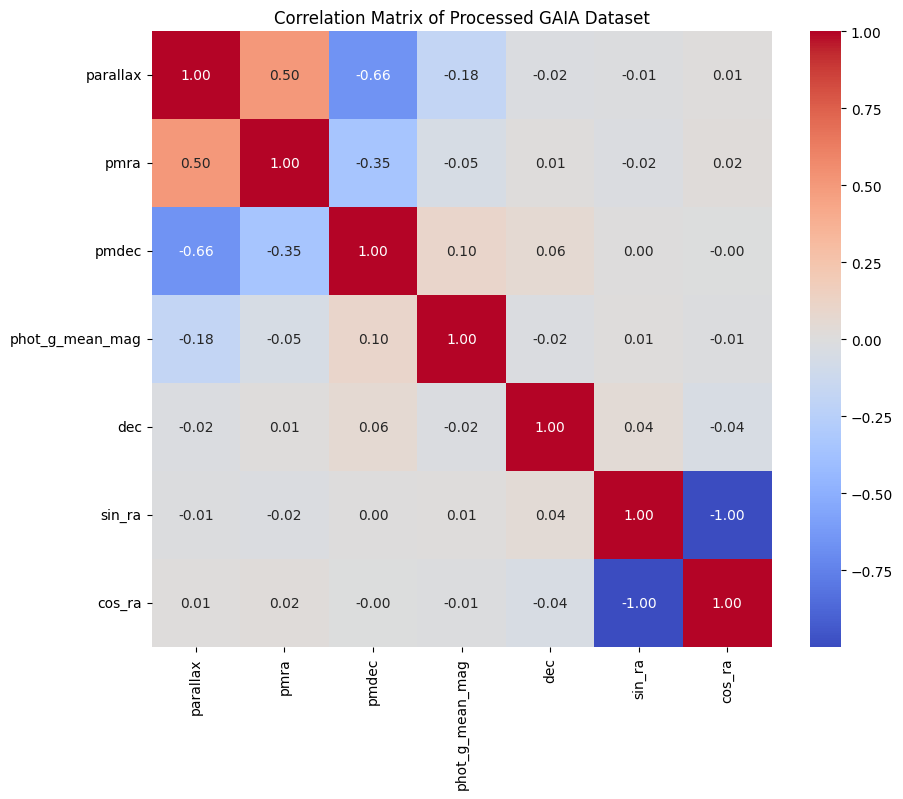


Processed data saved to processed_gaia_data.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file (ensure your Excel file is in the Colab working directory)
df = pd.read_excel('gaia_data.xlsx')

# Display the first few rows of the DataFrame
print("Data Preview:")
print(df.head())

# Convert RA (in degrees) to radians for trigonometric transformation
df['ra_rad'] = np.deg2rad(df['ra'])

# Create cyclic features for RA: sine and cosine components
df['sin_ra'] = np.sin(df['ra_rad'])
df['cos_ra'] = np.cos(df['ra_rad'])

# Define the features to be used for training
# We include parallax, pmra, pmdec, phot_g_mean_mag, dec, and the cyclic RA features
features = ['parallax', 'pmra', 'pmdec', 'phot_g_mean_mag', 'dec', 'sin_ra', 'cos_ra']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected features
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Display the scaled data preview
print("\nScaled Data Preview:")
print(df_scaled.head())

# Optional: Visualize the correlation matrix for these features
corr_matrix = df_scaled[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Processed GAIA Dataset")
plt.show()

# Save the processed DataFrame to a new Excel file
output_filename = 'processed_gaia_data.xlsx'
df_scaled.to_excel(output_filename, index=False)
print(f"\nProcessed data saved to {output_filename}")

# Download the file using Google Colab's files module
from google.colab import files
files.download(output_filename)


Data Preview:
         ra       dec  parallax      pmra     pmdec  phot_g_mean_mag  \
0  9.000620  1.591508 -0.032881 -0.700010  0.288028         0.442515   
1  9.000867  0.395485 -0.209079 -0.245556  0.029541        -2.184876   
2  9.002268  0.680219  2.362345  0.090388  0.670783        -1.999977   
3  9.002318 -1.186216 -0.621664 -0.456171  0.175405         0.999976   
4  9.007298  0.843785 -0.116265 -0.205067  0.288138        -0.991245   

   radial_velocity    ra_rad    sin_ra    cos_ra  
0       -22.222065  0.157090 -1.696669  1.640597  
1        12.153476  0.157095 -1.696250  1.640220  
2       -24.353867  0.157119 -1.693878  1.638089  
3       -36.000114  0.157120 -1.693792  1.638013  
4         6.085216  0.157207 -1.685359  1.630434  

Correlation with 'radial_velocity':
ra                 0.005583
dec               -0.028826
parallax           0.155444
pmra               0.138914
pmdec              0.054091
phot_g_mean_mag   -0.139120
radial_velocity    1.000000
ra_rad        

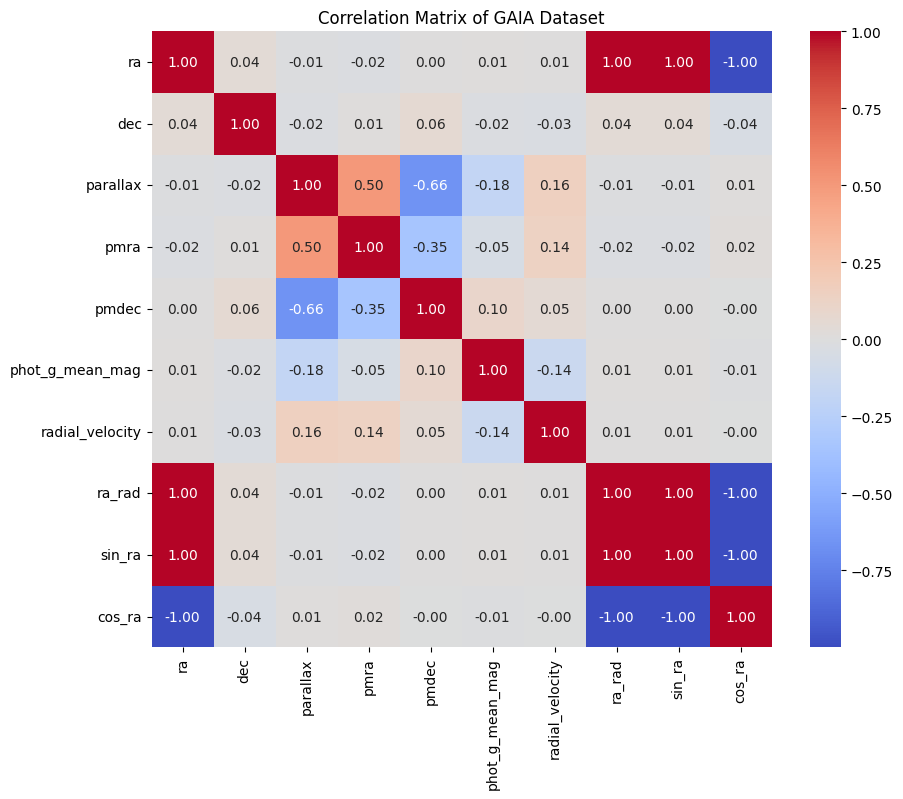

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file (ensure your Excel file is in the Colab working directory or provide the full path)
df = pd.read_excel('processed_gaia_data.xlsx')

# Display the first few rows of the DataFrame
print("Data Preview:")
print(df.head())

# Compute the correlation matrix for all numeric features
corr_matrix = df.corr()

# Print the correlation values with 'radial_velocity'
print("\nCorrelation with 'radial_velocity':")
print(corr_matrix['radial_velocity'])

# Visualize the full correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of GAIA Dataset")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2143.1499 - mae: 33.1619 - val_loss: 1644.7531 - val_mae: 30.7676
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1728.1747 - mae: 27.9261 - val_loss: 1127.5459 - val_mae: 25.7608
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1368.3313 - mae: 26.3399 - val_loss: 1108.1292 - val_mae: 25.3783
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1349.0177 - mae: 26.2018 - val_loss: 1079.8199 - val_mae: 25.2013
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1197.2574 - mae: 25.0746 - val_loss: 1068.0422 - val_mae: 24.8406
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1516.0251 - mae: 26.6799 - val_loss: 1055.4371 - val_mae: 24.6048
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1353.6543 - mae: 25.0720 - val_loss: 1037.5966 - val_mae: 24.3924
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1147.9143 - mae: 24.6732 - val_loss: 1030.6390 - val_mae: 24.2409
Epoch 9/

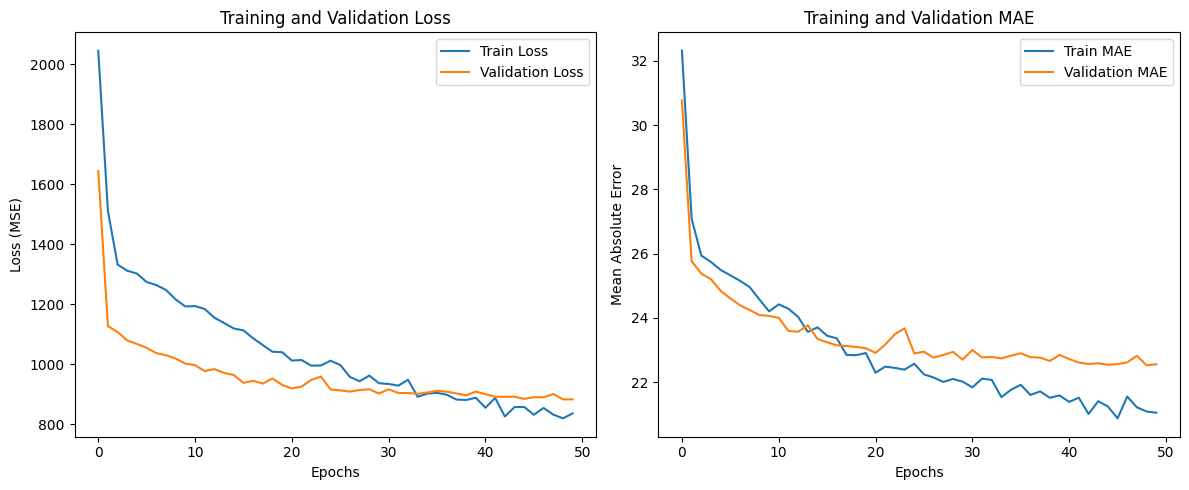

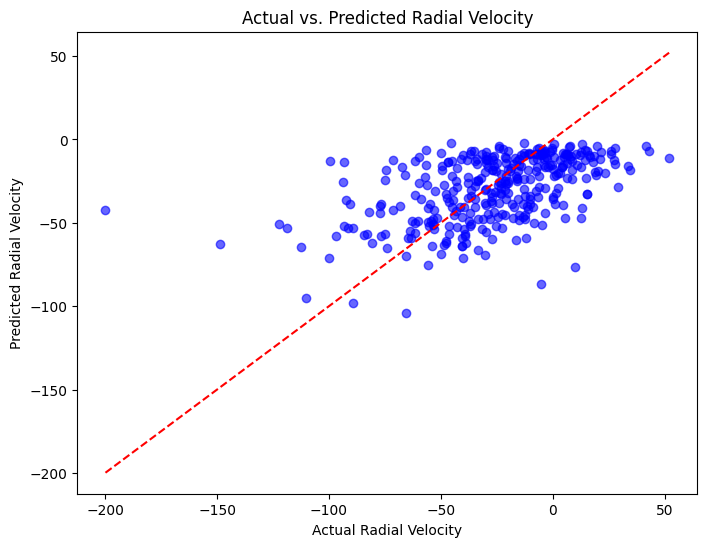

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the processed Excel file (ensure it's in your Colab working directory)
df = pd.read_excel('processed_gaia_data.xlsx')

# Define the features and target.
# Here we include all available features:
features = ['parallax', 'pmra', 'pmdec', 'phot_g_mean_mag', 'ra', 'dec', 'sin_ra', 'cos_ra']
target = 'radial_velocity'

# Drop any rows with missing values in the selected columns
df = df.dropna(subset=features + [target])

# Create the feature matrix and target vector
X = df[features].values
y = df[target].values

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=len(features), activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for predicting radial_velocity
])

# Compile the model using Mean Squared Error (MSE) as loss and Mean Absolute Error (MAE) as a metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()

# Train the model for 50 epochs with a batch size of 16 and a validation split of 20%
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the training history for loss and MAE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Validation MAE")
plt.legend()

plt.tight_layout()
plt.show()

# Optionally, plot Actual vs. Predicted radial_velocity
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Radial Velocity")
plt.ylabel("Predicted Radial Velocity")
plt.title("Actual vs. Predicted Radial Velocity")
plt.show()


Test MSE: 888.6171
Test MAE: 21.8691


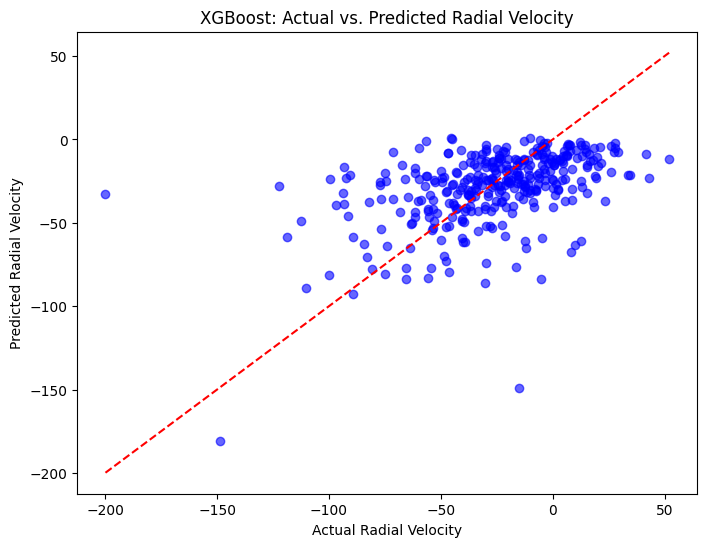

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# Load the processed Excel file (ensure it's in your Colab working directory)
df = pd.read_excel('processed_gaia_data.xlsx')

# Define the features and target.
# You can include all features or a subset; here we include all available features.
features = ['parallax', 'pmra', 'pmdec', 'phot_g_mean_mag', 'ra', 'dec', 'sin_ra', 'cos_ra']
target = 'radial_velocity'

# Drop any rows with missing values in the selected columns
df = df.dropna(subset=features + [target])

# Create the feature matrix and target vector
X = df[features].values
y = df[target].values

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor with some default parameters
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

# Plot Actual vs. Predicted radial velocity
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Radial Velocity")
plt.ylabel("Predicted Radial Velocity")
plt.title("XGBoost: Actual vs. Predicted Radial Velocity")
plt.show()


Test MSE: 725.2656
Test MAE: 20.3967


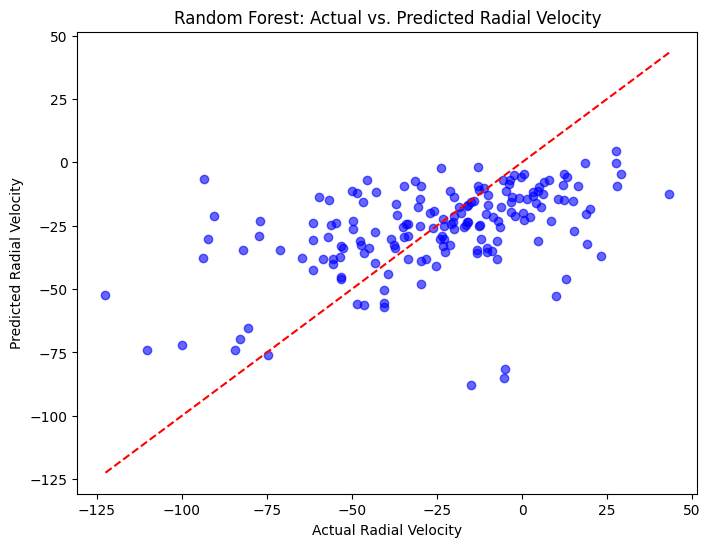

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the processed Excel file
df = pd.read_excel('processed_gaia_data.xlsx')

# Define the features and target.
# Features include: parallax, pmra, pmdec, phot_g_mean_mag, ra, dec, sin_ra, and cos_ra.
features = ['parallax', 'pmra', 'pmdec', 'phot_g_mean_mag', 'ra', 'dec', 'sin_ra', 'cos_ra']
target = 'radial_velocity'

# Drop rows with missing values in the selected columns
df = df.dropna(subset=features + [target])

# Create the feature matrix and target vector
X = df[features].values
y = df[target].values

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Random Forest Regressor with example parameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance using MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

# Plot Actual vs. Predicted radial_velocity
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Radial Velocity")
plt.ylabel("Predicted Radial Velocity")
plt.title("Random Forest: Actual vs. Predicted Radial Velocity")
plt.show()


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation MAE: 22.251024402358905

Test MSE: 696.4133
Test MAE: 20.5368


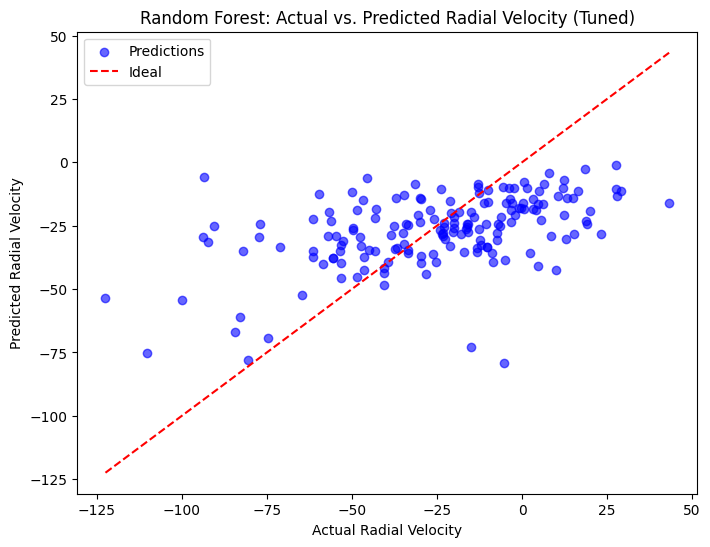

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the processed Excel file
df = pd.read_excel('processed_gaia_data.xlsx')

# Define the features and target.
features = ['parallax', 'pmra', 'pmdec', 'phot_g_mean_mag', 'ra', 'dec', 'sin_ra', 'cos_ra']
target = 'radial_velocity'

# Drop rows with missing values in the selected columns
df = df.dropna(subset=features + [target])

# Create the feature matrix and target vector
X = df[features].values
y = df[target].values

# Split the data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Random Forest Regressor (with a fixed random_state for reproducibility)
rf_model = RandomForestRegressor(random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV with negative MAE as the scoring metric (to minimize error)
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,
                           verbose=2)

# Run grid search on the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and best score from the grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation MAE:", -grid_search.best_score_)

# Use the best estimator from grid search to make predictions on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the tuned model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nTest MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

# Plot Actual vs. Predicted radial_velocity
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel("Actual Radial Velocity")
plt.ylabel("Predicted Radial Velocity")
plt.title("Random Forest: Actual vs. Predicted Radial Velocity (Tuned)")
plt.legend()
plt.show()


In [ ]:
import joblib
joblib.dump(best_rf, 'best_rf_model.pkl')


['best_rf_model.pkl']

In [ ]:
# Example: Predicting radial velocity for a new sample
# Suppose your new input values are as follows:
new_parallax = 1.5
new_pmra = 20.0
new_pmdec = -15.0
new_phot_g_mean_mag = 14.5
new_ra = 10.684  # in degrees
new_dec = 41.269  # in degrees

# Compute the cyclic features for RA
new_sin_ra = np.sin(np.deg2rad(new_ra))
new_cos_ra = np.cos(np.deg2rad(new_ra))

# Create a new feature vector in the same order as your training features
new_sample = np.array([[new_parallax, new_pmra, new_pmdec, new_phot_g_mean_mag,
                        new_ra, new_dec, new_sin_ra, new_cos_ra]])

# Predict the radial velocity using the best model from grid search
predicted_radial_velocity = best_rf.predict(new_sample)

print("Predicted Radial Velocity:", predicted_radial_velocity[0])


Predicted Radial Velocity: -139.02662744705594
